# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Simple Analytics using Pyspark

## Problem Statement

Perform simple analytics with Pyspark on the real estate valuation dataset and predict the house price per unit area

## Learning Objectives

At the end of the mini-project, you will be able to :

* analyze the data using pyspark
* derive the insights and visualize the data
* implement linear regression and evaluate using pyspark

### Dataset

The dataset chosen for this mini-project is **Real Estate Valuation dataset**. The data was collected from the historical market of real estate within Sindian District of New Taipei City, the timespan across 2012 August to 2013 July. In the dataset, the response variable (house price per unit area) is calculated in a local unit which is approximately $10000 New Taipei Dollar per 3.3 squared meters. For the collection of regressor data, the transaction dates are transformed into a format such that 2013.250 = 2013 March, 2013.500 = 2013 June etc. The house age was collected in years and the distance to MRT stations is measured in meters.

**Reference:**
The original owner of this Real Estate Valuation dataset is professor I-Cheng Yeh from TamKang University (Department of Civil Engineering). Prof. Yeh donated this dataset to UCI machine learning repository on 18th August 2018. The dataset can be accessed at https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set#[1].

In [ ]:
pip install --no -deps 'X'

## Grading = 10 Points

#### Install Pyspark

In [ ]:
#@title Install pyspark and Download the data
!pip -qq install pyspark==3.5.1
!pip -qq install handyspark
!pip -qq install numpy==1.25.4
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/RealEstate.csv
print("Packages installed and dataset downloaded successfully!")

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.25.4 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

#### Import required packages

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import MinMaxScaler
from handyspark import *
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, round as spark_round, udf
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.regression import LinearRegression
from handyspark import HandyFrame
import seaborn as sns
from matplotlib import pyplot as plt

### Data Loading (1 point)

#### Start a Spark Session

Spark session is a combined entry point of a Spark application, which came into implementation from Spark 2.0. It provides a way to interact with various spark’s functionality with a lesser number of constructs.

In [ ]:
spark = SparkSession.builder.appName('RealEstate').getOrCreate()

#### Load the data and infer the schema

To load the dataset use the `read.csv` with `inferSchema` and `header` as parameters.

In [ ]:
csv_path = "/content/RealEstate.csv"
# YOUR CODE HERE
data = spark.read.csv(csv_path, header=True, inferSchema=True)
data.show(5)
data.printSchema()

+---+-------------------+------------+--------------------------------------+-------------------------------+-----------+------------+--------------------------+
| No|X1 transaction date|X2 house age|X3 distance to the nearest MRT station|X4 number of convenience stores|X5 latitude|X6 longitude|Y house price of unit area|
+---+-------------------+------------+--------------------------------------+-------------------------------+-----------+------------+--------------------------+
|  1|           2012.917|        32.0|                              84.87882|                             10|   24.98298|   121.54024|                      37.9|
|  2|           2012.917|        19.5|                              306.5947|                              9|   24.98034|   121.53951|                      42.2|
|  3|           2013.583|        13.3|                              561.9845|                              5|   24.98746|   121.54391|                      47.3|
|  4|             2013.5|   

#### Fetch the data using handyspark

* Create a HandyFrame using handyspark `toHandy()` function

* using an instance of `cols` from your HandyFrame, you can retrieve values for given columns in the top N rows

Hint: [toHandy()](https://dvgodoy.github.io/handyspark/includeme.html)

In [ ]:
# YOUR CODE HERE
!pip install handyspark


In [ ]:
hdf = data.toHandy()
hdf.show(5)

/usr/local/lib/python3.12/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+-------------------+------------+--------------------------------------+-------------------------------+-----------+------------+--------------------------+
| No|X1 transaction date|X2 house age|X3 distance to the nearest MRT station|X4 number of convenience stores|X5 latitude|X6 longitude|Y house price of unit area|
+---+-------------------+------------+--------------------------------------+-------------------------------+-----------+------------+--------------------------+
|  1|           2012.917|        32.0|                              84.87882|                             10|   24.98298|   121.54024|                      37.9|
|  2|           2012.917|        19.5|                              306.5947|                              9|   24.98034|   121.53951|                      42.2|
|  3|           2013.583|        13.3|                              561.9845|                              5|   24.98746|   121.54391|                      47.3|
|  4|             2013.5|   

### Deriving the insights (2 points)

#### show the no. of records per month

Hint: Apply [groupby](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.GroupedData.agg.html) on transaction date and count the records using aggregation `agg()`

In [ ]:
# YOUR CODE HERE
data.groupBy('X1 transaction date').agg({'X1 transaction date':'count'}).withColumnRenamed('count(X1 transaction date)','Count').show()

+-------------------+-----+
|X1 transaction date|Count|
+-------------------+-----+
|            2012.75|   27|
|           2013.333|   29|
|           2013.083|   46|
|           2012.833|   31|
|             2013.5|   47|
|           2013.583|   23|
|           2013.417|   58|
|           2013.167|   25|
|            2013.25|   32|
|             2013.0|   28|
|           2012.917|   38|
|           2012.667|   30|
+-------------------+-----+



#### how much is the increase in the average house price in 2012 to 2013

Hint: Apply [filter](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.filter.html) on the transaction date and aggregate the house price using mean

In [ ]:
# YOUR CODE HERE
avg_2012 = data.filter(col('X1 transaction date') < 2013).agg(mean('Y house price of unit area').alias('avg_price')).collect()[0]['avg_price']
avg_2013 = data.filter(col('X1 transaction date') >= 2013).agg(mean('Y house price of unit area').alias('avg_price')).collect()[0]['avg_price']
increase = avg_2013 - avg_2012
print(f"Average house price increase from 2012 to 2013: {increase:.2f}")

Average house price increase from 2012 to 2013: 2.41


#### Find the count of houses with no convenience store and show the top 10 records

In [ ]:
# YOUR CODE HERE
no_store_df = data.filter(col('X4 number of convenience stores') == 0)
print("Count:", no_store_df.count())
no_store_df.show(10)

Count: 67
+---+-------------------+------------+--------------------------------------+-------------------------------+-----------+------------+--------------------------+
| No|X1 transaction date|X2 house age|X3 distance to the nearest MRT station|X4 number of convenience stores|X5 latitude|X6 longitude|Y house price of unit area|
+---+-------------------+------------+--------------------------------------+-------------------------------+-----------+------------+--------------------------+
| 31|             2013.5|        25.9|                               4519.69|                              0|   24.94826|   121.49587|                      22.1|
| 36|             2013.5|        13.9|                              4079.418|                              0|   25.01459|   121.51816|                      27.3|
| 41|             2013.0|        13.6|                              4082.015|                              0|   24.94155|   121.50381|                      15.9|
| 42|             

#### Compare the maximum price of houses *with convenient store* and *without convenience store*

In [ ]:
# YOUR CODE HERE
max_price_with = data.filter(col('X4 number of convenience stores') > 0).agg({'Y house price of unit area':'max'}).collect()[0]
max_price_without = data.filter(col('X4 number of convenience stores') == 0).agg({'Y house price of unit area':'max'}).collect()
print(f"Max price with convenience store: {max_price_with}, without: {max_price_without}")


Max price with convenience store: Row(max(Y house price of unit area)=117.5), without: [Row(max(Y house price of unit area)=55.3)]


#### Decode the transaction date

* create a year column separately by removing the decimal places from transaction date column

    Hint: `withColumn()`

* create a month column separately based on the decimal places from the transaction date column

 **Hints:** multiply decimal place number with 12 and apply round off, perform below steps
     
     - use `udf()` from pyspark
     - subtracting `transaction date` from `int(transaction date)` will give the decimal place number
     - multiply the result with 12 and roundoff

To know more about udf(), click [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.udf.html)

In [ ]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col, udf
import builtins

# Define Python-native UDF for month extraction
def get_month(td):
    if td is None:
        return None
    frac = td - int(td)
    return int(builtins.round(frac * 12 + 1))  # Explicitly use Python's built-in round

get_month_udf = udf(get_month, IntegerType())

# Add year and month columns
data = data.withColumn('year', col('X1 transaction date').cast(IntegerType()))
data = data.withColumn('month', get_month_udf(col('X1 transaction date')))

# Check result
data.select('X1 transaction date', 'year', 'month').show(5)

+-------------------+----+-----+
|X1 transaction date|year|month|
+-------------------+----+-----+
|           2012.917|2012|   12|
|           2012.917|2012|   12|
|           2013.583|2013|    8|
|             2013.5|2013|    7|
|           2012.833|2012|   11|
+-------------------+----+-----+
only showing top 5 rows



### Data Visualization (2 points)

#### Select the continuous variables from the data and visualize using histogram

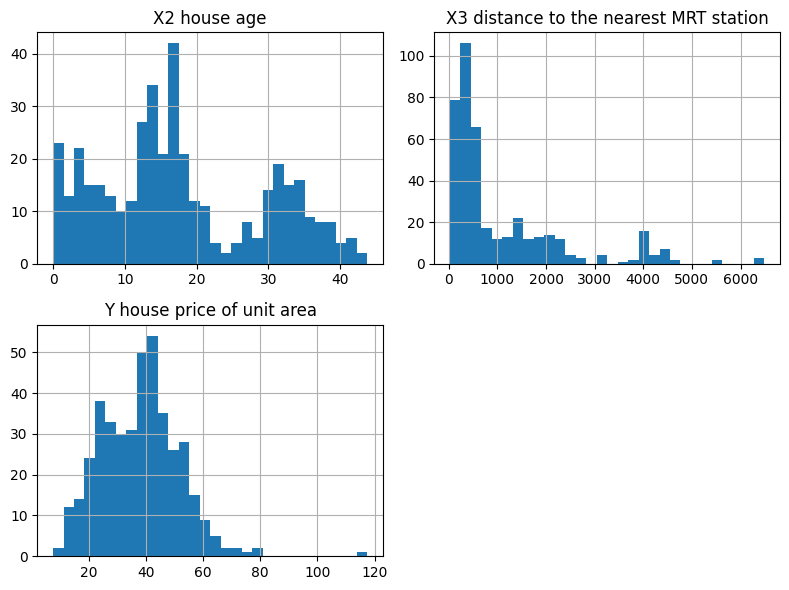

In [ ]:
# YOUR CODE HERE
numeric_columns = ['X2 house age', 'X3 distance to the nearest MRT station', 'Y house price of unit area']
pandas_df = data.select(numeric_columns).toPandas()
pandas_df.hist(bins=30, figsize=(8,6))
plt.tight_layout()
plt.show()


#### Visualize the transaction date using the countplot

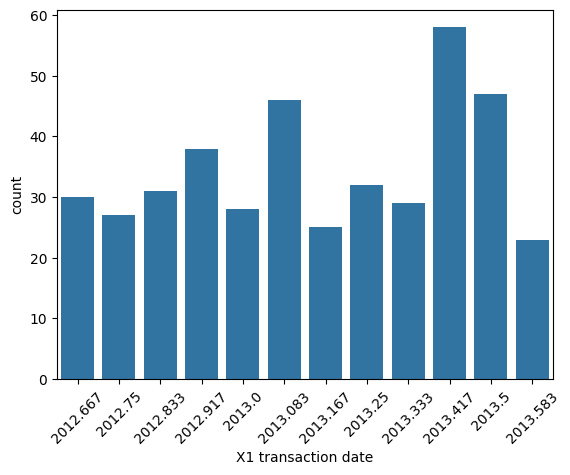

In [ ]:
# YOUR CODE HERE
date_counts = data.groupBy('X1 transaction date').count().orderBy('X1 transaction date').toPandas()
sns.barplot(x='X1 transaction date', y='count', data=date_counts)
plt.xticks(rotation=45)
plt.show()


#### visualize number of convenience stores with appropriate plot.

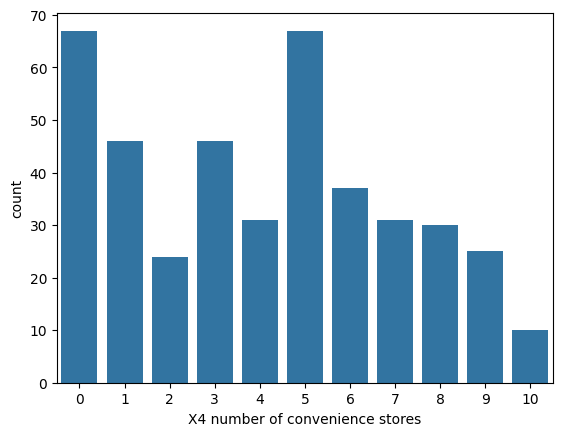

In [ ]:
# YOUR CODE HERE
sns.countplot(x=data.select('X4 number of convenience stores').toPandas()['X4 number of convenience stores'])
plt.show()


#### visualize the geographical distribution of the house prices of unit area

With:

* x-axis = X6 longitude
* y-axis = X5 latitude
* datapoints = Y house price of unit area
* parameters including size `s` and color map `cmap`

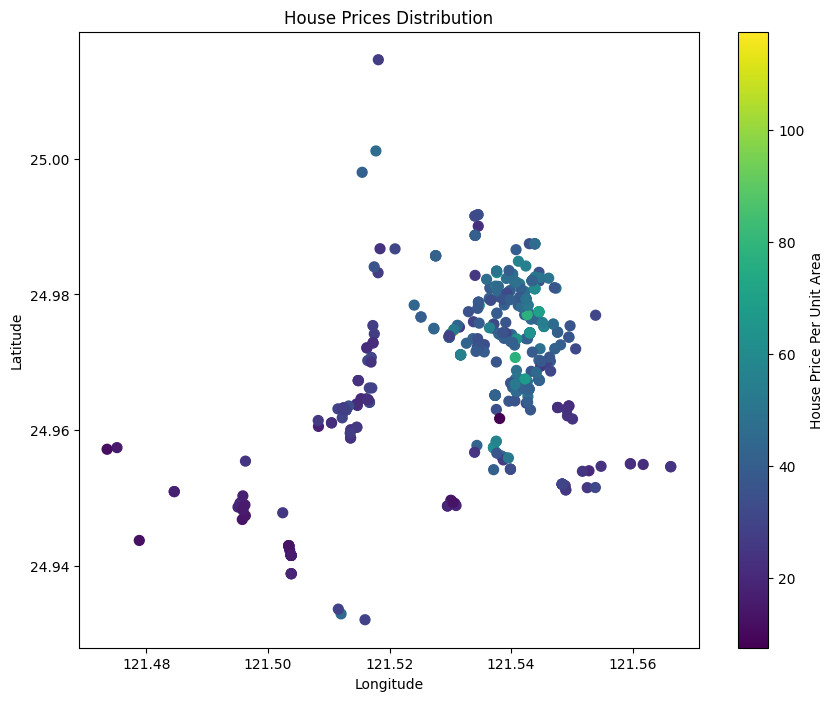

In [ ]:
# YOUR CODE HERE
geo_df = data.select('X5 latitude', 'X6 longitude', 'Y house price of unit area').toPandas()
plt.figure(figsize=(10,8))
plt.scatter(geo_df['X6 longitude'], geo_df['X5 latitude'],
            c=geo_df['Y house price of unit area'], s=50, cmap='viridis')
plt.colorbar(label='House Price Per Unit Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices Distribution')
plt.show()


### Feature Scaling (1 point)

#### Identify the outliers

Use the pairplot or boxplot to identify the outliers

   **Hint:** `sns.pairplot`

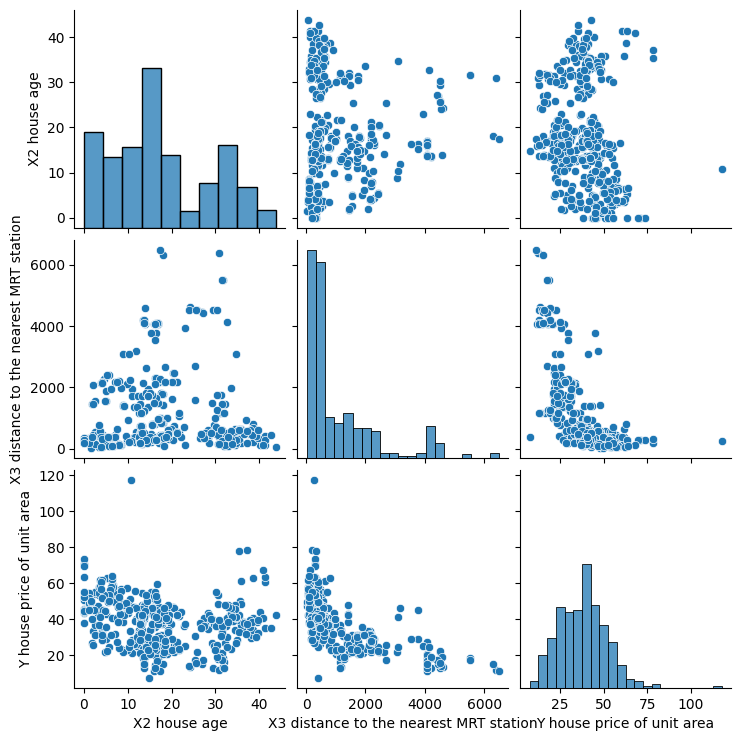

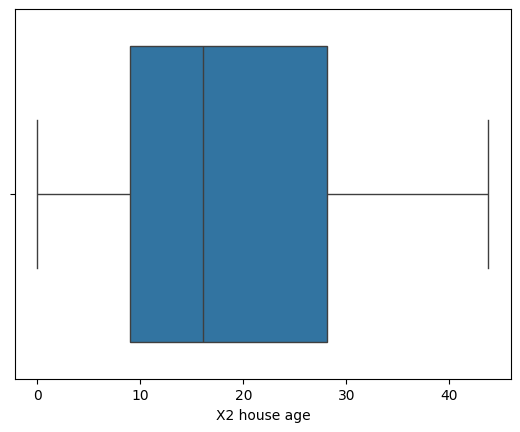

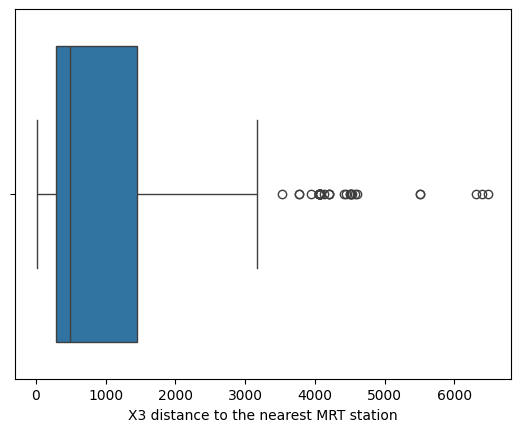

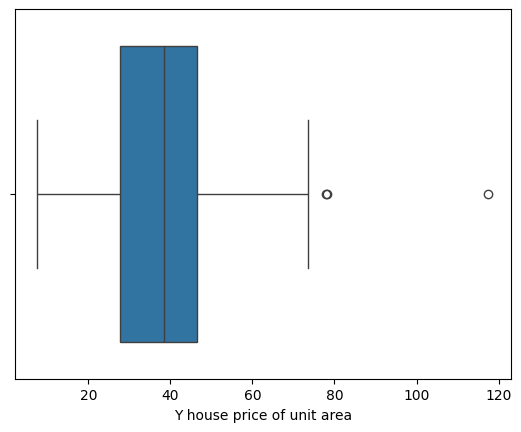

In [ ]:
# YOUR CODE HERE
sns.pairplot(pandas_df)
plt.show()

for col in numeric_columns:
    sns.boxplot(x=pandas_df[col])
    plt.show()


#### Correlation analysis

create the correlation matrix of all the columns and visualize using the heatmap

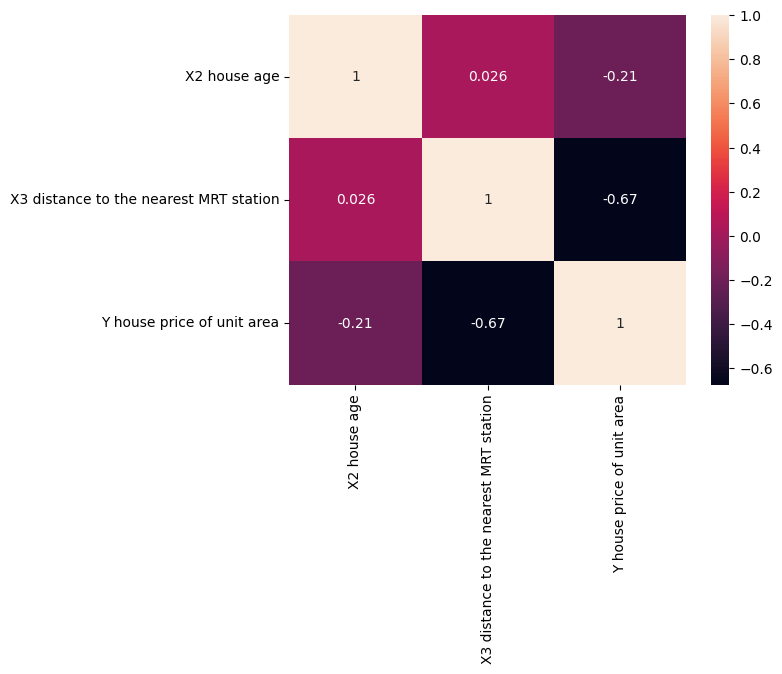

In [ ]:
# YOUR CODE HERE
corr = pandas_df.corr()
sns.heatmap(corr, annot=True)
plt.show()


#### Normalization or standardization

select the applicable features using vector assembler and apply scaling using `MinMaxScaler` from pyspark

Hint: [MinMaxScaler](https://spark.apache.org/docs/latest/ml-features#minmaxscaler)

In [ ]:
# YOUR CODE HERE
features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
assembler = VectorAssembler(inputCols=features, outputCol='features_unscaled')
assembled_data = assembler.transform(data)

scaler = MinMaxScaler(inputCol='features_unscaled', outputCol='features')
scaler_model = scaler.fit(assembled_data)
scaled_data = scaler_model.transform(assembled_data)
scaled_data.show(5)

### Feature Engineering (2 points)

#### Assemble the features

concatenate all the features into a single vector which can be further passed to the ML algorithm.

**Hint:** `VectorAssembler()`

In [ ]:
# YOUR CODE HERE
final_features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
assembler = VectorAssembler(inputCols=final_features, outputCol='features')
final_data = assembler.transform(data).select('features', 'Y house price of unit area')
#final_data = final_data.withColumnRenamed('house_price_per_unit_area', 'label')
final_data.show(5)

+--------------------+--------------------------+
|            features|Y house price of unit area|
+--------------------+--------------------------+
|[32.0,84.87882,10.0]|                      37.9|
| [19.5,306.5947,9.0]|                      42.2|
| [13.3,561.9845,5.0]|                      47.3|
| [13.3,561.9845,5.0]|                      54.8|
|  [5.0,390.5684,5.0]|                      43.1|
+--------------------+--------------------------+
only showing top 5 rows



#### Feature selection and splitting the data

In [ ]:
# YOUR CODE HERE
train_data, test_data = final_data.randomSplit([0.7, 0.3], seed=42)

In [ ]:
train_data.show(5)

+------------------+--------------------------+
|          features|Y house price of unit area|
+------------------+--------------------------+
|[0.0,185.4296,0.0]|                      37.9|
|[0.0,185.4296,0.0]|                      45.5|
|[0.0,185.4296,0.0]|                      55.2|
|[0.0,185.4296,0.0]|                      55.3|
|[0.0,208.3905,6.0]|                      44.0|
+------------------+--------------------------+
only showing top 5 rows



In [ ]:
test_data.show(5)

+------------------+--------------------------+
|          features|Y house price of unit area|
+------------------+--------------------------+
|[0.0,185.4296,0.0]|                      52.2|
|[0.0,208.3905,6.0]|                      45.7|
|[0.0,274.0144,1.0]|                      45.4|
|[0.0,274.0144,1.0]|                      52.2|
|[0.0,292.9978,6.0]|                      71.0|
+------------------+--------------------------+
only showing top 5 rows



### Train and Evaluate the model (2 points)

Using LinearRegression from `pyspark.ml` fit the data and find the coefficients and intercept

In [ ]:
regressor = LinearRegression(featuresCol='features', labelCol='label')

In [ ]:
# YOUR CODE HERE
regressor = LinearRegression(featuresCol='features', labelCol='Y house price of unit area')
model = regressor.fit(train_data)

print("Coefficients:", model.coefficients)
print("Intercept:", model.intercept)


Coefficients: [-0.2260047004169558,-0.004816344314610502,1.6114236109027555]
Intercept: 40.44513017039614


Get the predictions and show the table along with actual data and predicted data

In [ ]:
# YOUR CODE HERE
predictions = model.transform(test_data)
predictions.select('features', 'Y house price of unit area', 'prediction').show(10)


+------------------+--------------------------+------------------+
|          features|Y house price of unit area|        prediction|
+------------------+--------------------------+------------------+
|[0.0,185.4296,0.0]|                      52.2| 39.55203737067564|
|[0.0,208.3905,6.0]|                      45.7|49.109991435918836|
|[0.0,274.0144,1.0]|                      45.4| 40.73680608373749|
|[0.0,274.0144,1.0]|                      52.2| 40.73680608373749|
|[0.0,292.9978,6.0]|                      71.0|48.702493547589285|
|[0.0,292.9978,6.0]|                      73.6|48.702493547589285|
|[0.0,338.9679,9.0]|                      44.9| 53.31535655052048|
|[1.1,193.5845,6.0]|                      48.6|48.932697059382306|
|[1.1,193.5845,6.0]|                      54.4|48.932697059382306|
|[1.5,23.38284,7.0]|                      47.7| 51.27346858759655|
+------------------+--------------------------+------------------+
only showing top 10 rows



Calculate the RMSE and $R^2$ of the model

In [ ]:
# YOUR CODE HERE
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="Y house price of unit area", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = RegressionEvaluator(labelCol="Y house price of unit area", predictionCol="prediction", metricName="r2").evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Value: {r2:.2f}")


Root Mean Squared Error (RMSE): 11.69
R^2 Value: 0.41
